#             $$\text{Gnu Radio Companion with Machine Learning} $$

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
noise = np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /sem_msg_3"), dtype=np.complex64)#NO MESSAGE
fm991 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /teste.dat"), dtype=np.complex64 ) 
fm889 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /fm_88.9_a1"), dtype=np.complex64 ) 
fm932 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /fm_93.9_a2"), dtype=np.complex64 ) 
plt.rcParams["font.size"] = 24
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"


plt.style.use("fivethirtyeight")

### $$\text{The dataset is refer to FM frequence of 99,1 signal and the noise of 105 Fm}$$
>* On this topic, we are going to separated the dataset between slices of 200000 rows each columns for both data, the noise one and the fm 99,1
* On the following , we have each autocorrelation , to understand how each dataframe is related and by that , we can make comparisson about those correlations
* Secondly , we apply the fourier on the both signal to notice spectrum for each and the distribution of frequence along with time
* Thirdly, we plot how distance each value find themselves from each dataset , noise and fm 99,1, to understand what metric of distance we are going to use, such as euclidean method or manhatan method

---

### $$\text{Supervising learning Knn and evaluations scores}$$

> Firstly , we are going to apply on two types from our dataset and make insight from it.



1.   Energy Frequence $=>$ By applying  $"np.abs(dataset(FFT))"$ we have the module of complex dtype and we have as result the energy from the amplitude. Thus, we going to follow the steps below using KNN .

2.  Complex dtype $=>$ Applying the KNN and other method tecniques on complex number slicing on the columns, as real number and imaginary .


>* Now that , we already understand the data by analysing autocorrelation, distribution along the time, how closely or far way each value are , we have to apply the algorithm machine learing K -nearest neighboors 
* Firstly , we slice the data on training and test, 70% and 30 % each, for our algorithm understand the pattern and learn what makes the data a signal with message and what's not.
*Secondly, we apply the KNN method, fit and prediction to score how accuracy our method was related to the original data.
* On this project, we using F1_Score, Precicion, MAE, RMSE, Recall, Score and Acurracy, as tools to metric the quality about our prediction. 
* After that, we have to improve our data and make sure the response by the metric tools was indeed correct, therefore we make sure by using Cross Validation with 10 , 15 or 20 folds, GridSearch to improving Knn method and RandomGridSearch to take the better method 
* On the final topic, we have an answer about the method by using confusion matrix and report classification 

In [3]:
print('\n fmm91',fm991.shape)
print('\n noise', noise.shape)


 fmm91 (11698176,)

 noise (1867264,)


In [4]:
pd.DataFrame(noise) # BEFORE FOURIER

,0
0,0.000159-0.000106j
1,0.000670-0.001249j
2,0.002546+0.002546j
3,-0.000984-0.002860j
4,-0.003125+0.002281j
...,...
1867259,-0.003125+0.002281j
1867260,-0.001249-0.001249j
1867261,0.000405+0.002281j
1867262,0.000628-0.003125j


In [5]:
Fourier_Complex = pd.Series(np.fft.fftn(noise)) 
Fourier_Complex  = pd.DataFrame(Fourier_Complex)
Fourier_Complex #AFTER FOURIRER 

,0
0,-1485.767962-1529.248014j
1,-13.84633600-12.16683500j
2,-4.365619000-6.091625000j
3,4.403332000+1.145403000j
4,-2.731570000+1.408917000j
...,...
1867259,-0.284080000-2.349589000j
1867260,0.265585000+0.241092000j
1867261,-1.008979000-1.986350000j
1867262,-3.823546000-4.760424000j


## $$\text{Xr Array} $$
xrarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple 
array introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures

In [6]:
import xarray as xr

xra = xr.DataArray(Fourier_Complex)
print(xra)

<xarray.DataArray (dim_0: 1867264, dim_1: 1)>
array([[-1.48576796e+03-1529.24801369j],
       [-1.38463361e+01  -12.16683494j],
       [-4.36561857e+00   -6.09162534j],
       ...,
       [-1.00897860e+00   -1.98635039j],
       [-3.82354566e+00   -4.76042406j],
       [-8.67056533e+00  -15.285264j  ]])
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 ... 1867259 1867260 1867261 1867262 1867263
  * dim_1    (dim_1) int64 0


In [7]:

data = xr.DataArray(
    np.random.random(size =(499,2)),
    dims =("row","col"),
    coords = {"col": [10,11],
              "row": range(10,5000,10)}   #Coordinate
)
print(data)

<xarray.DataArray (row: 499, col: 2)>
array([[0.16790558, 0.40145687],
       [0.91009739, 0.18699988],
       [0.96280556, 0.90613372],
       [0.88258792, 0.70073543],
       [0.2717141 , 0.99055627],
       [0.0605216 , 0.82439003],
       [0.68913345, 0.72413646],
       [0.0357105 , 0.72082409],
       [0.06849987, 0.5737338 ],
       [0.35883259, 0.54173586],
       [0.99042291, 0.48197182],
       [0.34838287, 0.89412031],
       [0.76019922, 0.98696642],
       [0.89070276, 0.74310703],
       [0.84979589, 0.03961385],
       [0.2429433 , 0.48300816],
       [0.2072346 , 0.31604992],
       [0.62540323, 0.1740364 ],
       [0.76874496, 0.14646922],
       [0.89507086, 0.84919628],
...
       [0.70914039, 0.51644703],
       [0.97099635, 0.69972471],
       [0.52765556, 0.85820449],
       [0.8473339 , 0.28453725],
       [0.77445267, 0.10858581],
       [0.54087313, 0.11750909],
       [0.59193812, 0.54243717],
       [0.69256938, 0.28916166],
       [0.37887559, 0.0183017 ],
 

In [8]:
#def save_complex(data_array, *args, **kwargs):
 #   ds = xarray.Dataset({'real': data_array.real, 'imag': data_array.imag})
  #  return ds.to_netcdf(*args, **kwargs)

## $$\textbf{Creating signal dataset}$$



In [9]:
# Creating empy array to fill each columns with the dataset
empty_1 =  np.empty([5]) # The dataset will be with 5 columns , each represent a signal 
empty_1 = pd.DataFrame()
empty_0 = empty_1
#############################################
signalfm1 , signalfm2 , signalfm3= fm991[:400000] , fm991[400000:800000], fm991[80000:1200000]
signalfm4 , signalfm5 = fm991[1200000:1600000], fm991[1600000:2000000]

##################################################

fm_sample = [signalfm1,signalfm2,signalfm3,signalfm4,signalfm5]

i=0
for i in range(0,5):
    empty_1[i] = pd.DataFrame(fm_sample[i],dtype=np.float64)
    i+=1

FM = empty_1
FM = FM.rename(columns = {0:'sinal1', 1:'sinal2' , 2:'sinal3', 3:'sinal4',4:'sinal5'})
FM['Signal'] = 1 # AS KNOWS EXISTENCE OF SIGNAL
FM.describe()

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.0
mean,-0.000284,-0.000155,-0.000243,-0.000275,-0.000242,1.0
std,0.015955,0.015725,0.015981,0.015225,0.015442,0.0
min,-0.037152,-0.037417,-0.037152,-0.036580,-0.035011,1.0
25%,-0.015262,-0.015220,-0.015262,-0.014955,-0.014955,1.0
50%,-0.000454,0.000140,-0.000231,-0.000496,-0.000454,1.0
75%,0.014864,0.014683,0.014906,0.014376,0.014641,1.0
max,0.037962,0.038492,0.038492,0.034655,0.034920,1.0


## $$\textbf{AutoCorrelation}$$

<function matplotlib.pyplot.show(*args, **kw)>

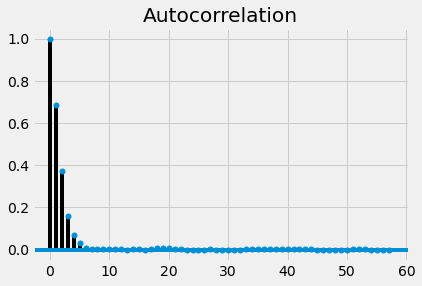

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
fmradio = FM[['sinal4']]
#mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply
#fmradio = np.abs(mm.fit_transform(fmradio))
plot_acf(np.abs(fmradio))
plt.grid(True)
plt.show

In [ ]:
FM.mean()

sinal1   -0.000284
sinal2   -0.000155
sinal3   -0.000243
sinal4   -0.000275
sinal5   -0.000242
Signal    1.000000
dtype: float64

### $$\textbf{Creating Noise dataset}$$

In [10]:
noise1 , noise2 , noise3= noise[:400000] , noise[400000:800000], noise[800000:1200000]
noise4 , noise5 = noise[1200000:1600000], noise[1600000:2000000]

noise_sample = [noise1,noise2,noise3, noise4, noise5]
i=0
for i in range(0,5):
    empty_0[i] = pd.DataFrame(noise_sample[i], dtype=np.float64)
    i+=1

Noise = empty_0
Noise = Noise.rename(columns = {0:'sinal1', 1:'sinal2' , 2 :'sinal3',3:'sinal4',4:'sinal5'})
Noise['Signal'] = 0
Noise.describe()

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,400000.000000,400000.000000,400000.000000,400000.000000,267264.000000,400000.0
mean,-0.000806,-0.000789,-0.000790,-0.000792,-0.000805,0.0
std,0.001951,0.001982,0.001964,0.001947,0.001956,0.0
min,-0.006655,-0.006655,-0.006655,-0.006655,-0.006655,0.0
25%,-0.002860,-0.002860,-0.002860,-0.002860,-0.002860,0.0
50%,-0.000984,-0.000984,-0.000984,-0.000984,-0.000984,0.0
75%,0.000405,0.000405,0.000405,0.000405,0.000405,0.0
max,0.004687,0.005811,0.004687,0.006076,0.005811,0.0


## $$\textbf{Autocorrelation} $$

<function matplotlib.pyplot.show(*args, **kw)>

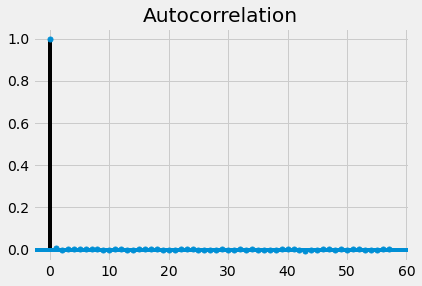

In [ ]:
nois = Noise[['sinal4']]
#mm = MinMaxScaler(feature_range=(0, 1)) # doing the reshape to make easier to aour method apply
#nosignal1 = mm.fit_transform(nois)
plot_acf(np.abs(nois))
plt.grid(True)
plt.show


In [ ]:
Noise.mean()

sinal1   -0.000806
sinal2   -0.000789
sinal3   -0.000790
sinal4   -0.000792
sinal5   -0.000805
Signal    0.000000
dtype: float64

##  $$ \textbf{Why Would You Need the Fourier Transform?} $$
* The Fourier transform is useful in many applications. For example, Shazam and other music identification services use the Fourier transform to identify songs. JPEG compression uses a variant of the Fourier transform to remove the high-frequency components of images. Speech recognition uses the Fourier transform and related transforms to recover the spoken words from raw audio.

* In general, you need the Fourier transform if you need to look at the frequencies in a signal. If working with a signal in the time domain is difficult, then using the Fourier transform to move it into the frequency domain is worth trying

<function matplotlib.pyplot.show(*args, **kw)>

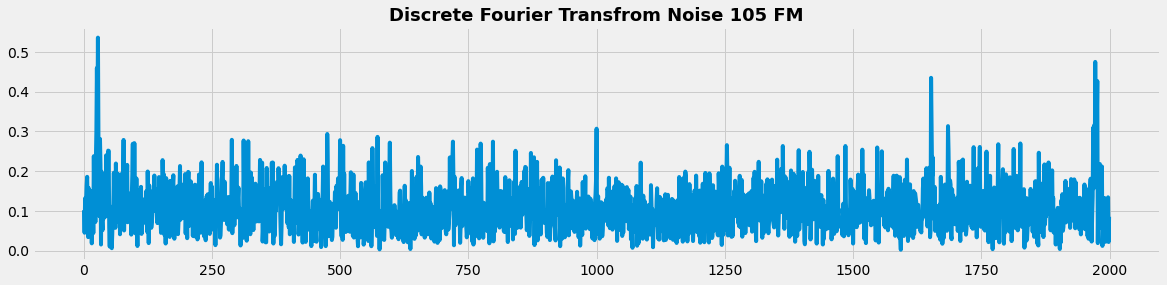

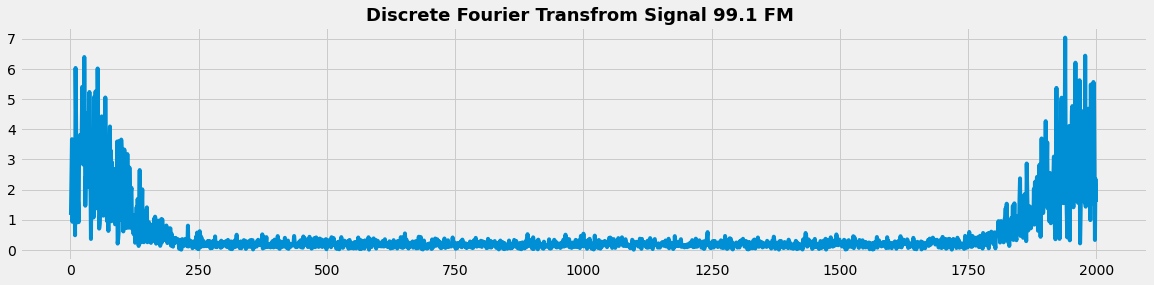

In [ ]:
ny0 = np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /sem_msg_3"), dtype=np.float32)#NO MESSAGE
fm991 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /teste.dat"), dtype=np.float32 ) 
fm889 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /fm_88.9_a1"), dtype=np.float32 ) 
fm932 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /fm_93.9_a2"), dtype=np.float32 ) 
#freq = np.fft.fftfreq()
NOsignal = ny0[:3999]
Signal = fm991[:3999]
##############################
fourier= np.fft.fft(NOsignal) # FFT FROM THE NO SIGNAL DATASET
no = NOsignal.size
timestep = 1/ no
freqno = np.fft.fftfreq(no,d=timestep)
mascara = freqno > 0
############################
plt.figure(figsize= (18,4))
plt.title("Discrete Fourier Transfrom Noise 105 FM", size = 18, fontweight = 'bold')
plt.plot(freqno[mascara],np.abs(fourier[mascara]))
plt.grid(True)
plt.show
################################
fouriersignal= np.fft.fft(Signal) # FFT FROM THE NO SIGNAL DATASET
sig = Signal.size
timestep = 1/ sig
freqsign= np.fft.fftfreq(sig,d=timestep)
masksig = freqsign > 0
#########################
plt.figure(figsize= (18,4))
plt.title("Discrete Fourier Transfrom Signal 99.1 FM ", size = 18, fontweight = 'bold')
plt.plot(freqsign[masksig],np.abs(fouriersignal[masksig]))
plt.grid(True)
plt.show

In [11]:
#FM = pd.DataFrame(np.fft.rfftn(FM.iloc[:,1:5]))
#Noise = pd.DataFrame(np.fft.rfftn(Noise.iloc[:,1:5]))
#Noise= Noise.iloc[:10000]
Noise['Signal'] = 0
FM['Signal'] = 1

### Creating one dataset , which has signal and noise values

In [12]:
gnu = pd.concat([FM,Noise]).reset_index()
#gnu= gnu.drop(columns=['index'])
gnu  

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,0,-0.000106,-0.006655,-0.003390,-0.012591,0.003892,1
1,1,-0.018708,-0.007185,-0.012814,0.006034,0.004422,1
2,2,-0.024951,-0.003390,-0.018220,0.016030,0.011747,1
3,3,-0.024644,-0.002860,-0.019873,0.018436,0.010094,1
4,4,-0.023891,0.003034,-0.015220,0.018394,0.008482,1
...,...,...,...,...,...,...,...
799995,399995,-0.002595,-0.002860,-0.000719,0.002546,NaN,0
799996,399996,-0.000984,-0.002595,-0.002860,-0.003125,NaN,0
799997,399997,-0.003125,-0.000719,-0.000984,0.002546,NaN,0
799998,399998,-0.000984,-0.000719,0.002811,-0.000984,NaN,0


In [13]:
signal = gnu[gnu['Signal'] ==1]# JUST THE ONE HAS SIGNAL
signal.head()

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
0,0,-0.000106,-0.006655,-0.003390,-0.012591,0.003892,1
1,1,-0.018708,-0.007185,-0.012814,0.006034,0.004422,1
2,2,-0.024951,-0.003390,-0.018220,0.016030,0.011747,1
3,3,-0.024644,-0.002860,-0.019873,0.018436,0.010094,1
4,4,-0.023891,0.003034,-0.015220,0.018394,0.008482,1


In [14]:
nosignal = gnu[gnu['Signal'] ==0] # NO SIGNAL
nosignal.head()

,index,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
400000,0,0.000159,-0.003125,0.002546,-0.002860,-0.000984,0
400001,1,0.000670,-0.002860,-0.000984,-0.000719,-0.000719,0
400002,2,0.002546,0.002546,-0.003125,-0.000984,-0.002860,0
400003,3,-0.000984,-0.000984,-0.003125,0.000405,-0.001249,0
400004,4,-0.003125,0.004422,-0.000984,0.002281,-0.000984,0


### $$ \textbf{Distance between each data related}  $$

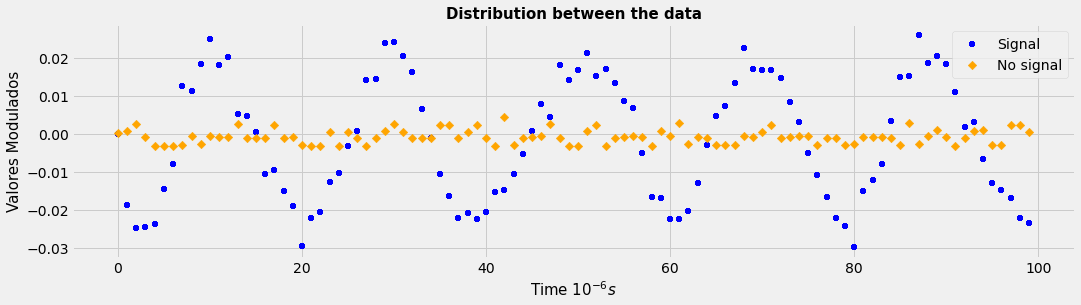

In [ ]:


signal = signal[['index','sinal1']]
signal = signal.iloc[:100]
nosignal = nosignal[['index','sinal1']]
nosignal = nosignal.iloc[:100]
########################################
plt.figure(figsize = (16,4))
plt.title("Distribution between the data", fontweight='bold', size = 15)
plt.scatter(signal['index'], (signal['sinal1']), color = 'b', marker = "+", label = 'Signal')
plt.scatter(nosignal['index'], (nosignal['sinal1']), color = 'orange', marker = 'D',label = 'No signal')
plt.xlabel('Time $10^{-6} s$', size = 15)
plt.ylabel('Valores Modulados', size = 15)
plt.legend()
plt.grid(True)

### $$ \textbf{Supervising Machine Learning algorithm} $$

* We are goint to slice the data between train and test , chosing our features and applying the knn method

In [15]:
# Creating empy array to fill each columns with the dataset
empty_1 =  np.empty([5]) # The dataset will be with 5 columns , each represent a signal 
empty_1 = pd.DataFrame()
empty_0 = empty_1

for i in range(0,5):
    empty_1[i] = pd.DataFrame(np.abs(np.fft.fftn(noise_sample[i])))
    i+=1

FM_fourier = empty_1
FM_fourier = FM_fourier.rename(columns = {0:'sinal1', 1:'sinal2' , 2:'sinal3', 3:'sinal4',4:'sinal5'})
FM_fourier['Signal'] = 1 # AS KNOWS EXISTENCE OF SIGNAL
FM_fourier.describe()


,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,400000.000000,400000.000000,400000.000000,400000.000000,267264.000000,400000.0
mean,1.514186,1.539377,1.527296,1.510960,1.240430,1.0
std,1.132248,1.131558,1.124596,1.120429,0.927025,0.0
min,0.003502,0.001198,0.004654,0.003132,0.003195,1.0
25%,0.902759,0.918668,0.915731,0.903500,0.742454,1.0
50%,1.408335,1.429689,1.420015,1.406325,1.152865,1.0
75%,1.995579,2.030512,2.014249,1.990231,1.631738,1.0
max,462.779787,453.085098,452.748185,453.405226,310.147034,1.0


In [16]:
for i in range(0,5):
    empty_0[i] = pd.DataFrame(np.abs(np.fft.fftn(noise_sample[i])))
    i+=1

noise_fourier = empty_1
noise_fourier = noise_fourier.rename(columns = {0:'sinal1', 1:'sinal2' , 2:'sinal3', 3:'sinal4',4:'sinal5'})
noise_fourier['Signal'] = 0 # AS KNOWS EXISTENCE OF SIGNAL
noise_fourier.describe()

,sinal1,sinal2,sinal3,sinal4,sinal5,Signal
count,400000.000000,400000.000000,400000.000000,400000.000000,267264.000000,400000.0
mean,1.514186,1.539377,1.527296,1.510960,1.240430,0.0
std,1.132248,1.131558,1.124596,1.120429,0.927025,0.0
min,0.003502,0.001198,0.004654,0.003132,0.003195,0.0
25%,0.902759,0.918668,0.915731,0.903500,0.742454,0.0
50%,1.408335,1.429689,1.420015,1.406325,1.152865,0.0
75%,1.995579,2.030512,2.014249,1.990231,1.631738,0.0
max,462.779787,453.085098,452.748185,453.405226,310.147034,0.0


In [17]:
fourier_noise = xr.DataArray(noise_fourier)
fourier_signal = xr.DataArray(FM_fourier)

In [46]:
gnu = pd.concat([FM_fourier,noise_fourier]).reset_index()
gnu = gnu.fillna(0)

In [48]:
X = gnu.iloc[:,1:3] # THE TRAINING DATASET
X 

,sinal1,sinal2
0,462.779787,453.085098
1,2.741378,2.597372
2,2.734942,3.174468
3,0.947789,1.932629
4,1.619715,0.532264
...,...,...
799995,0.967550,1.619086
799996,1.785941,0.655072
799997,1.026526,1.202351
799998,4.296391,0.286792


In [49]:
y = gnu.iloc[:,6] # THE TARGET DATASET
y 

0         1
1         1
2         1
3         1
4         1
         ..
799995    0
799996    0
799997    0
799998    0
799999    0
Name: Signal, Length: 800000, dtype: int64


## *$$\textbf{Creating Train Test Split}$$*

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.40,random_state= 100) # 35 % TO TEST 

print("lenght x train = {} \n lenght x test = {} " .format(len(X_train), len(X_test)))

lenght x train = 480000 
 lenght x test = 320000 


### *$$\textbf{Min Max Scaler}$$*
*$\textbf{Core of the method}$*
 > A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

*$\textbf{Why to normalize prior to model fitting?}$*
> The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

$$ x' =\frac{x -min(x)}{max(x) -min(x)}$$


In [51]:
mm = MinMaxScaler(feature_range=(0, 1)) # doing the reshape to make easier to aour method apply

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
#gnu0 = mm.fit_transform(df0)
#gnu1 = mm.fit_transform(df1)

In [52]:
X_train

array([[0.00099736, 0.00224754],
       [0.00259019, 0.00166007],
       [0.00098703, 0.00383703],
       ...,
       [0.00348487, 0.00587737],
       [0.00180505, 0.00356811],
       [0.00479784, 0.0005448 ]])

In [53]:
X_test 

array([[0.00359543, 0.00490051],
       [0.00204049, 0.00486684],
       [0.00776019, 0.00394409],
       ...,
       [0.00189302, 0.00431321],
       [0.00411535, 0.00160388],
       [0.00313563, 0.00179474]])

### $$ \textbf{Creating KNN = ( K Neighrest Neighbour Classifier )} $$
##### p, default=2
* Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. \newline

* for p = 2 , we have $\sqrt{(a1-b2)^{2} +(a1-b2)^{2}}$ , Euclidean Distance 
* for p = 1 , we have $ |(a1-b2)| + |(a1-b2)| $ , Manhattan Distance 

##### weights{‘uniform’, ‘distance’} or callable, default=’uniform’

* uniform’ : uniform weights. All points in each neighborhood are weighted equally.
* ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
* [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

#### Types of Knn method
* KNN Classifier = chooses the same class as most of the 'n' nearest neighbors of the data to be sorted
* KNN Regressor = choose the average of the label of the 'n' neighbors

### Number of K, how do we choose ?
* $\sqrt{n}$ , where n can be number of data points
* Odd value of K is selected to avoid confusion between two classes of data
* By choosing smaller number, you can find yourself not much accurate, by chossing larger number , the classification may be tend to the label with more frequence

In [54]:
knn = KNeighborsClassifier(n_neighbors= 7,weights='distance', p=2, leaf_size=50)
KNN = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred.shape)
print(y_test.shape)


(320000,)
(320000,)


### $$\text{Types of measurements explored}$$
* Mean Absolute Error - MAE
The mean absolute error, MAE (from the acronym in English Mean Absolute Error), is based on the average of the absolute errors, that is, the module of each error used to avoid an underestimation, because the value is smaller by extreme points. (outliers).

Each error, can be interpreted as the difference between Y and Ŷ and thus, we have:
$$ MAE = \frac{1}{n}\sum_{i}^{n}|y_i test - y_ipred |$$

* Mean Square Error - MSE

The quadratic, MSE (Mean Squared Error), is commonly used to verify the accuracy of and gives greater weight to the largest models, since, when calculating errors, each error is squared and this is the penalty for errors. larger, after that, to these squared errors is average
$$ MSE = \frac{1}{n}\sum_{i}^{n}(y_i test - y_ipred )^{2}$$

* Square Root of Mean Error - RMSE
The Root Mean Squared Error (RMSE) is just the square root of the MSE, where the error returns to the model's unit of measure (in MSE, the unit of measure is quadratic).

It is often used in time series as it is more sensitive to larger errors due to the quadrature process it has produced.

$$ RMSE = \sum_{i}^{n}\frac{(y_i test - y_ipred)^{2}}{n}$$

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt

train_preds = knn.predict(X_train)
mse_1 = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_1)


test_preds = knn.predict(X_test)
mse_2 = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_2)


metrics = {"RMSE TRAIN": rmse_train,"RMSE TEST":rmse_test,'Score':knn.score(X_test,y_test)
          ,'Accuracy':accuracy_score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds),
          'Recall':recall_score(y_test,test_preds)}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS

metrics = pd.DataFrame([metrics])
metrics

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.547867,0.894294,0.200238,0.200238,0.200517,0.200702


## $$\text{How the score number was calculated} $$?

* Accuracy = $$\frac{True Positive (TP) + False Positive (FP)}{Total} $$

is the number of hits in our model divided by the total sample.

* Precision = $$\frac{True Positive (TP) }{True Positive (TP) + False Positive (FP)} $$

of all the data classified as positive, how many are actually positive.

* Recall = $$\frac{True Positive (TP) }{True Positive (TP) + False Negative (FP)} $$

what is the percentage of data classified as positive compared to the actual number of positives that exist in our sample.


* F1_Score = $$\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

this metric combines precision and recall in order to bring a single number that determines the overall quality of our model

### $$ \textbf{Cross-Validation} $$
Cross-validation is a technique for evaluating the generalizability of a model from a set of data. This technique is widely used in problems where the modeling objective is prediction.Is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments:

* The snippet below divides the dataset into 10 subsets (folds)
* Then it will train the knn model 10 times
*For each execution, a different fold will be selected
* The result is an array with the evaluation of 10 scores


In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
# The results were not so good now
# Cross-validation lets you see beyond average performance,
# see also how accurate this is (standard deviation)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
pd.DataFrame(display_scores(tree_rmse_scores))

Scores: [0.82528404 0.82532191 0.82526511 0.82870381 0.82388182 0.82562476
 0.82713738 0.82585183 0.82441267 0.82078469]
Mean: 0.8252268017398787
Standard deviation: 0.0019623175509171104


""



## **$$ \textbf{Improving KNN  Random Search} $$**

>When the number of possible options is very large, it is better to randomize, using RandomizedSearchCV

* When the number of possible options is very large, it is better to randomize
* It is similar to GridSearch, but without testing all possible alternatives, but without testing all possible alternatives, This can be accomplished using a RandomizedSearchCV class

>With the GridSearchCV or RandomSearchCV estimator, the parameters need to be specified explicitly.Exploring a large number of values for different parameters will be quickly untractable.Instead, we can randomly generate the parameter candidates. Indeed, such approach avoids the regularity of the grid.


In [58]:
from sklearn.model_selection import RandomizedSearchCV


parameters = {'n_neighbors': range(1,21,1),
                         'weights': ['uniform', 'distance'], 'p':[1,2], 
              'algorithm':['auto', 'kd_tree']
             }
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

randomsearch = RandomizedSearchCV(KNN, param_distributions=parameters,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, return_train_score=True)


In [59]:
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'n_neighbors': range(1, 21),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [60]:
parms_random_estimator = randomsearch.best_params_
parms_random_estimator

{'weights': 'uniform', 'p': 2, 'n_neighbors': 16, 'algorithm': 'kd_tree'}

In [61]:
randomsearch.best_score_

-0.5636979166666667

In [62]:
randomsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=16)

In [63]:
# Here we can sure the mean test score for each randon interaction by RandomSearchCV
cvres = randomsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.8602664315974053 {'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'algorithm': 'kd_tree'}
0.7648352219051282 {'weights': 'uniform', 'p': 1, 'n_neighbors': 8, 'algorithm': 'kd_tree'}
0.8608861713374191 {'weights': 'distance', 'p': 1, 'n_neighbors': 16, 'algorithm': 'kd_tree'}
0.8606864992551004 {'weights': 'distance', 'p': 2, 'n_neighbors': 14, 'algorithm': 'auto'}
0.7783288722213337 {'weights': 'uniform', 'p': 2, 'n_neighbors': 4, 'algorithm': 'kd_tree'}
0.8603233403784882 {'weights': 'distance', 'p': 1, 'n_neighbors': 8, 'algorithm': 'auto'}
0.8603596631641909 {'weights': 'distance', 'p': 1, 'n_neighbors': 6, 'algorithm': 'kd_tree'}
0.8606877095284522 {'weights': 'distance', 'p': 2, 'n_neighbors': 13, 'algorithm': 'auto'}
0.7702989138423256 {'weights': 'uniform', 'p': 1, 'n_neighbors': 6, 'algorithm': 'kd_tree'}
0.7507981863767831 {'weights': 'uniform', 'p': 2, 'n_neighbors': 16, 'algorithm': 'kd_tree'}


In [64]:
results = pd.DataFrame(randomsearch.cv_results_).sort_values("mean_test_score", ascending=False)
results_p2 = results[results['param_p']==2] 
results_p1 = results[results['param_p']==1] 
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_algorithm,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,0.345650,0.091658,3.079073,0.064185,uniform,2,16,kd_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",-0.564281,...,-0.563698,0.000940,1,-0.430703,-0.431367,-0.431417,-0.431807,-0.432695,-0.431598,0.000653
1,0.291731,0.016010,2.978021,0.214020,uniform,1,8,kd_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",-0.584229,...,-0.584973,0.000926,2,-0.408242,-0.407977,-0.408477,-0.408760,-0.408930,-0.408477,0.000344
8,0.293480,0.015399,2.893334,0.104152,uniform,1,6,kd_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",-0.592708,...,-0.593360,0.000831,3,-0.398573,-0.398404,-0.398833,-0.398156,-0.399453,-0.398684,0.000443
4,0.301115,0.010912,2.762566,0.032066,uniform,2,4,kd_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",-0.604490,...,-0.605796,0.001114,4,-0.385148,-0.384815,-0.386026,-0.384865,-0.385417,-0.385254,0.000442
0,0.375843,0.166732,0.724391,0.369219,distance,1,7,kd_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",-0.740104,...,-0.740058,0.000676,5,-0.240271,-0.240419,-0.240057,-0.239477,-0.240258,-0.240096,0.000331


Text(0.5, 1.0, 'Performance vs Number of K , Manhatam Distance ')

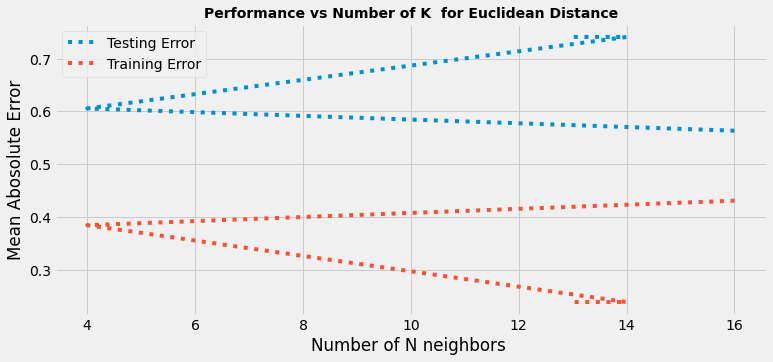

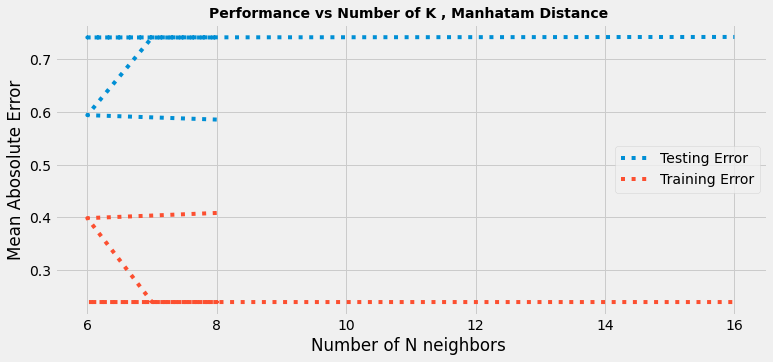

In [65]:
import seaborn as sns
# No warnings about setting value on copy of slice

plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(results_p2["param_n_neighbors"], np.abs(results_p2["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results_p2["param_n_neighbors"], np.abs(results_p2["mean_train_score"]), label = "Training Error", linestyle= 'dotted')
plt.xlabel("Number of N neighbors "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of K  for Euclidean Distance",size = 14, fontweight='bold')

plt.figure(figsize=(25,5))
plt.subplot(1,2,2)
plt.plot(results_p1["param_n_neighbors"], np.abs(results_p1["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results_p1["param_n_neighbors"], np.abs(results_p1["mean_train_score"]), label = "Training Error", linestyle = 'dotted')
plt.xlabel("Number of N neighbors "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of K , Manhatam Distance ", size = 14, fontweight='bold')



#### $$ Analysis $$

* Euclidean distance : 

As we can see, the Euclidean distance has better performance when we increase the number of $ " K neighbors "$ and the graph shows us that didn't happen over or under fitting 

* Euclidean distance : 

As we can see, the Euclidean distance has better performance when we increase the number of $ " K neighbors "$ and the graph shows us that didn't happen over or under fitting 

In [66]:
final_predictions_train = randomsearch.predict(X_train)
train_mse = mean_squared_error(y_train, final_predictions_train)
train_rmse = sqrt(train_mse)


final_predictions_test = randomsearch.predict(X_test)
test_mse = mean_squared_error(y_test, final_predictions_test)
test_rmse = sqrt(test_mse)

acc = {"Rmse Train": train_rmse,"Rmse Test ":test_rmse, 
       'Score':randomsearch.score(X_test,y_test),
       'Accuracy':accuracy_score(y_test,final_predictions_test),
       'F1_Score':f1_score(y_test,final_predictions_test),
      'Recall':recall_score(y_test,final_predictions_test)}


pd.DataFrame([acc])

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
0,0.664646,0.7664,-0.587369,0.412631,0.309283,0.263156


In [67]:
# At this time, you may not feel confident to use it in the real world, as
# doesn't know if the result is reliable. For this, the 95% confidence interval must be computed.
# This test will allow you to assess whether the range is reasonable for your application

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions_test - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.76528623, 0.76751188])

#### $$\textbf{Improving RandomSearch using GridSearchCV}$$

>>So far we've used k =3 in kNN, but let's use GridSearchCV to find the best value for K .
When you use near neighbors, you have a much more variable prediction than you will use more neighbors:
* If you use only one neighbor, a forecast may change mainly from one point to another. When you think of your own neighbors, one may be quite different from the others. If you lived near a 1-N forecast outlier your right house.
* If you have multiple data points, the impact of an extremely different neighbor will be much smaller.
* If you use next risks, a prediction of each point risks being too close. 

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)


parameters = {      
              'leaf_size': [3,5,7,9,12,15,19,25],
              'n_jobs' : [-1]
             }
        
gridsearch = GridSearchCV( randomsearch.best_estimator_, 
                           param_grid= parameters,
                           cv = 3 ,  
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True )
                              


In [104]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=KNeighborsClassifier(algorithm='kd_tree',
                                            n_neighbors=16),
             n_jobs=-1,
             param_grid={'leaf_size': [3, 5, 7, 9, 12, 15, 19, 25],
                         'n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
gridsearch.best_params_


{'leaf_size': 3, 'n_jobs': -1}

In [107]:
results_grid = gridsearch.cv_results_

results_grid = pd.DataFrame(results_grid).sort_values("mean_test_score", ascending=False)

results_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.475512,0.029494,8.461126,0.254865,3,-1,"{'leaf_size': 3, 'n_jobs': -1}",-0.550819,-0.550831,-0.549519,-0.550390,0.000616,1,-0.423594,-0.425081,-0.425869,-0.424848,0.000943
7,0.365649,0.028304,7.914974,0.145712,25,-1,"{'leaf_size': 25, 'n_jobs': -1}",-0.551050,-0.550769,-0.549362,-0.550394,0.000738,2,-0.423613,-0.425212,-0.426091,-0.424972,0.001026
1,0.628294,0.158396,8.930894,0.621217,5,-1,"{'leaf_size': 5, 'n_jobs': -1}",-0.551219,-0.550881,-0.549831,-0.550644,0.000591,3,-0.423625,-0.425100,-0.425916,-0.424880,0.000948
2,0.519426,0.094310,7.932924,0.411034,7,-1,"{'leaf_size': 7, 'n_jobs': -1}",-0.551219,-0.550881,-0.549831,-0.550644,0.000591,3,-0.423625,-0.425100,-0.425916,-0.424880,0.000948
3,0.462133,0.021557,7.940000,0.139091,9,-1,"{'leaf_size': 9, 'n_jobs': -1}",-0.551219,-0.550881,-0.549831,-0.550644,0.000591,3,-0.423625,-0.425100,-0.425916,-0.424880,0.000948


In [108]:
# A variavel best_estimator_ apresenta o melhor modelo com seus parametros
best_estimator = gridsearch.best_estimator_
best_estimator


KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_jobs=-1,
                     n_neighbors=16)

In [109]:
# Podemos visualizar os escores das avaliações (18) realizadas
# Podemos observar que o melhor escore é 49,689 relacionado com melhor estimator (linha 12)
# O resultado melhou o ultimo treinamento realizado 50,182
cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.741882459243601 {'leaf_size': 3, 'n_jobs': -1}
0.7420537379462487 {'leaf_size': 5, 'n_jobs': -1}
0.7420537379462487 {'leaf_size': 7, 'n_jobs': -1}
0.7420537379462487 {'leaf_size': 9, 'n_jobs': -1}
0.7420944459209129 {'leaf_size': 12, 'n_jobs': -1}
0.7420944459209129 {'leaf_size': 15, 'n_jobs': -1}
0.7420944459209129 {'leaf_size': 19, 'n_jobs': -1}
0.7418852674099952 {'leaf_size': 25, 'n_jobs': -1}


#### Plot comparing how good our model learning the data

Text(0.5, 1.0, 'Performance vs Number of leaf size for Euclidean Distance')

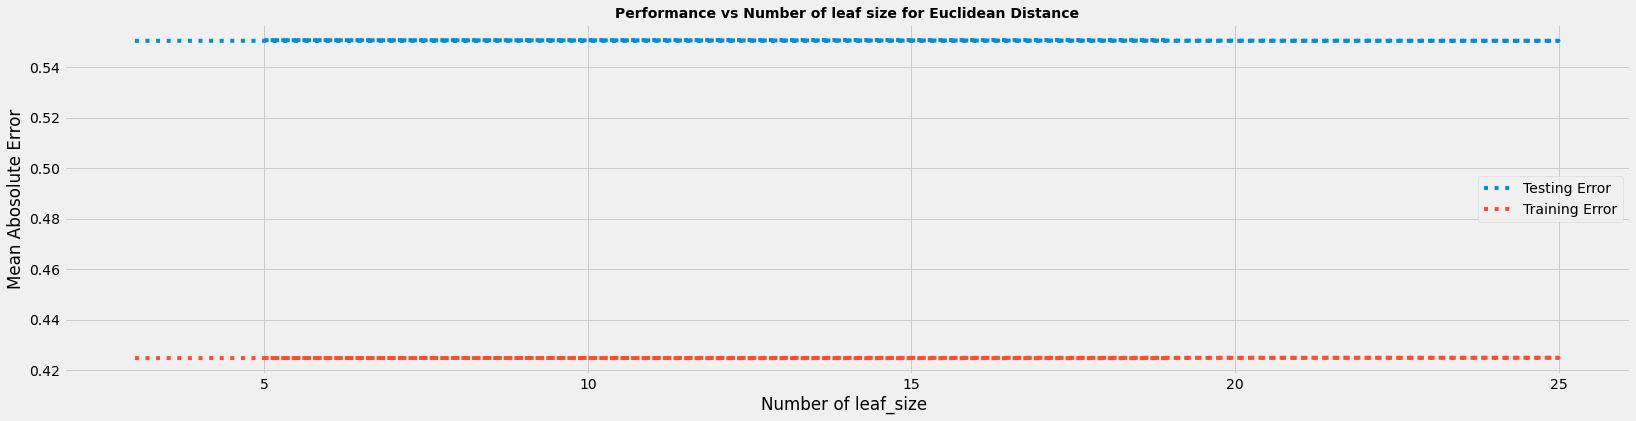

In [110]:
# No warnings about setting value on copy of slice


plt.figure(figsize=(25,6))

plt.plot(results_grid["param_leaf_size"], np.abs(results_grid["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results_grid["param_leaf_size"], np.abs(results_grid["mean_train_score"]), label = "Training Error", linestyle= 'dotted')
plt.xlabel("Number of leaf_size "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of leaf size for Euclidean Distance",size = 14, fontweight='bold')




In [111]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
######################
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

################################
acc = {"Rmse Train": train_rmse,"Rmse Test ":test_rmse, 
       'Score':gridsearch.score(X_test,y_test),
       'Accuracy':accuracy_score(y_test,test_preds_grid),
       'F1_Score':f1_score(y_test,test_preds_grid),
      'Recall':recall_score(y_test,test_preds_grid)}
###############################
acc = pd.DataFrame([acc])
acc

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
0,0.664535,0.766545,-0.587591,0.412409,0.30943,0.263437


### **$$\textbf{Confusion Matrix}$$**

>In the field of Machine Learning, a confusion matrix is ​​a table that allows the visualization of the performance of a classification algorithm. This special 2x2 contingency table is also called an error matrix.

* Compute confusion matrix to evaluate the accuracy of a classification.
* By definition a confusion matrix *C* is such that $C\small{i,j}*$ is equal to the number of observations known to be in group \textit{i}  and predicted to be in group $_j$  .



In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_preds_grid)
cm

array([[ 89845,  70246],
       [117783,  42126]])

Text(70.66, 0.5, 'Truth')

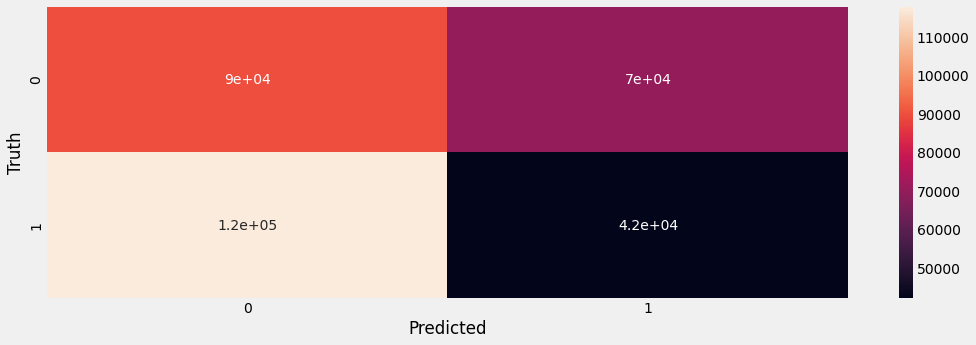

In [113]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot = True )
plt.xlabel('Predicted')
plt.ylabel('Truth')

>> A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below

In [97]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, final_predictions_test))

              precision    recall  f1-score   support

           0       0.43      0.56      0.49    160091
           1       0.38      0.26      0.31    159909

    accuracy                           0.41    320000
   macro avg       0.40      0.41      0.40    320000
weighted avg       0.40      0.41      0.40    320000



## Creating KNN model using 2 coordinates from real axis and imaginary by format $a+bi$

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt


Fourier_numeric = pd.Series(np.fft.fftn(fm991))
Fourier_numeric_noise = pd.Series(np.fft.fftn(noise))

Fourier_numeric = np.array([Fourier_numeric])
Fourier_numeric_noise = np.array([Fourier_numeric_noise])


real , imag = Fourier_numeric.real , Fourier_numeric.imag
real , imag = pd.DataFrame(real), pd.DataFrame(imag)


real_n , imag_n = Fourier_numeric_noise.real , Fourier_numeric_noise.imag
real_n , imag_n = pd.DataFrame(real_n), pd.DataFrame(imag_n)


In [ ]:
real =real.T[:1600000]
imag =imag.T[:1600000]

real_n =real_n.T[:1600000]
imag_n =imag_n.T[:1600000]


real = real.reset_index()
imag = imag.reset_index()
real_n = real_n.reset_index()
imag_n = imag_n.reset_index()


real = real.rename(columns = {0:"SinalFm_real"})
imag= imag.rename(columns = {0:"SinalFM_imag"})

real_n = real_n.rename(columns = {0:"SinalFm_real"})
imag_n= imag_n.rename(columns = {0:"SinalFM_imag"})



imag = imag.drop([0,1])
real = real.drop([0,1])
imag_n = imag_n.drop([0,1])
real_n = real_n.drop([0,1])


In [ ]:
signalfm = pd.merge(real, imag , how = 'inner')
signalfm['Signal'] = 1
signalnoise = pd.merge(real_n, imag_n, how = 'inner')
signalnoise['Signal'] = 0
signals = pd.merge(signalfm, signalnoise, how ='outer')
signals

,index,SinalFm_real,SinalFM_imag,Signal
0,2,139.189806,-24.322918,1
1,3,130.934365,-26.458197,1
2,4,-47.562993,137.101212,1
3,5,-21.494847,77.075357,1
4,6,-216.016410,-178.255059,1
...,...,...,...,...
3199991,1599995,-2.914623,2.170976,0
3199992,1599996,2.347945,-0.982716,0
3199993,1599997,-1.324272,-2.030958,0
3199994,1599998,-2.344348,0.125313,0


In [ ]:
X = signals.iloc[:,1:3] ## x = signals.drop(columns='Signal')
y = signals.iloc[:,3]  ## y = signals['Signal']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state= 60) 

print("lenght x train = {} \n lenght x test = {} " .format(len(X_train), len(X_test)))

#mm = MinMaxScaler(feature_range=(-1, 1)) # doing the reshape to make easier to aour method apply

#X_train = mm.fit_transform(X_train)
#X_test = mm.transform(X_test)
#gnu0 = mm.fit_transform(df0)
#gnu1 = mm.fit_transform(df1)


lenght x train = 2559996 
 lenght x test = 640000 


In [ ]:
mm = MinMaxScaler(feature_range=(0, 1)) # doing the reshape to make easier to aour method apply

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [ ]:

knn = KNeighborsClassifier(n_neighbors= 7,weights='distance', p=2, leaf_size=50)
KNN = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred.shape)
print(y_test.shape)



(640000,)
(640000,)


In [ ]:

train_preds = knn.predict(X_train)
mse_1 = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_1)

test_preds = knn.predict(X_test)
mse_2 = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_2)


metrics = {"RMSE TRAIN": rmse_train,"RMSE TEST":rmse_test,'Score':knn.score(X_test,y_test)
          ,'Accuracy':accuracy_score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds),
          'Recall':recall_score(y_test,test_preds)}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS
metrics = pd.DataFrame([metrics])
metrics

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.0,0.127873,0.983648,0.983648,0.98354,0.977652


## $$ \textbf{Improving the model using RandomSearch.}$$
here, our focus is to plot the quality of train learning dataset facing the testing learning quality as well. Thus, we can make sure if was some overfitting or underfitting in our problem to solve this later.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


parameters = {'n_neighbors': range(1,20,1),
                         'weights': ['uniform', 'distance'], 'p':[1,2]
             }

randomsearch = RandomizedSearchCV(KNN, param_distributions=parameters,
                                n_iter=10, cv=4, scoring='neg_mean_squared_error', 
                                random_state=42, return_train_score=True)



In [ ]:
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

Best estimator for out method apply

In [ ]:
parms_random_estimator = randomsearch.best_params_
parms_random_estimator

{'weights': 'uniform', 'p': 2, 'n_neighbors': 13}

In [ ]:
cvres = randomsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.13609233148584898 {'weights': 'uniform', 'p': 1, 'n_neighbors': 2}
0.12527947317239865 {'weights': 'distance', 'p': 2, 'n_neighbors': 9}
0.12857704725704036 {'weights': 'uniform', 'p': 2, 'n_neighbors': 3}
0.15599366139978252 {'weights': 'uniform', 'p': 1, 'n_neighbors': 1}
0.12373589130792598 {'weights': 'distance', 'p': 1, 'n_neighbors': 12}
0.12372642015392167 {'weights': 'distance', 'p': 2, 'n_neighbors': 12}
0.12245703963359045 {'weights': 'distance', 'p': 1, 'n_neighbors': 17}
0.12311716445775965 {'weights': 'distance', 'p': 1, 'n_neighbors': 14}
0.12096302787457229 {'weights': 'uniform', 'p': 2, 'n_neighbors': 13}
0.12206565152116453 {'weights': 'uniform', 'p': 1, 'n_neighbors': 8}


In [ ]:
results = pd.DataFrame(randomsearch.cv_results_).sort_values("mean_test_score", ascending=False)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
8,2.941056,0.359246,26.859919,2.884566,uniform,2,13,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 13}",-0.014580,-0.014591,...,-0.014598,-0.014632,0.000074,1,-0.013967,-0.013951,-0.013870,-0.013953,-0.013935,0.000038
9,2.545018,0.019751,23.550111,0.393873,uniform,1,8,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 8}",-0.014952,-0.014808,...,-0.014841,-0.014900,0.000079,2,-0.013789,-0.013769,-0.013717,-0.013769,-0.013761,0.000026
6,2.556251,0.044693,9.821480,0.051867,distance,1,17,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",-0.014961,-0.014958,...,-0.014967,-0.014996,0.000059,3,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
7,3.052442,0.898948,8.999540,0.221657,distance,1,14,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",-0.015155,-0.015097,...,-0.015114,-0.015158,0.000066,4,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
5,2.617186,0.037464,6.926923,0.032412,distance,2,12,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",-0.015291,-0.015256,...,-0.015267,-0.015308,0.000065,5,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


#### Plot comparing how good our model learning the data

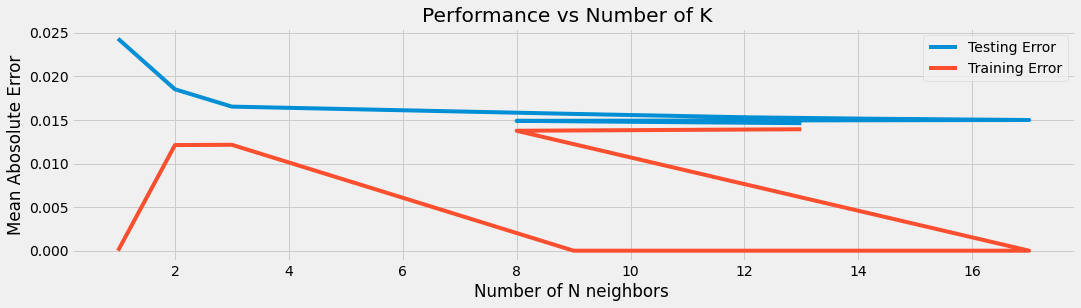

In [ ]:
import seaborn as sns
# No warnings about setting value on copy of slice

plt.figure(figsize=(16,4))
plt.plot(results["param_n_neighbors"], np.abs(results["mean_test_score"]), label = "Testing Error")
plt.plot(results["param_n_neighbors"], np.abs(results["mean_train_score"]), label = "Training Error")
plt.xlabel("Number of N neighbors "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of K  ");

#### Analysing the metrics evaluation by classifier methods

In [ ]:
final_predictions_train = randomsearch.predict(X_train)
train_mse = mean_squared_error(y_train, final_predictions_train)
train_rmse = sqrt(train_mse)

final_predictions_test = randomsearch.predict(X_test)
test_mse = mean_squared_error(y_test, final_predictions_test)
test_rmse = sqrt(test_mse)


acc = {"Rmse Train": train_rmse,"Rmse Test ":test_rmse, 
       'Score':randomsearch.score(X_test,y_test),
       'Accuracy':accuracy_score(y_test,final_predictions_test),
       'F1_Score':f1_score(y_test,final_predictions_test),
      'Recall':recall_score(y_test,final_predictions_test)}


pd.DataFrame([acc])

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
0,0.118029,0.121752,-0.014823,0.985177,0.985062,0.97808


In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,final_predictions_test)
cm



array([[317718,   2477],
       [  7010, 312795]])

Text(70.66, 0.5, 'Truth')

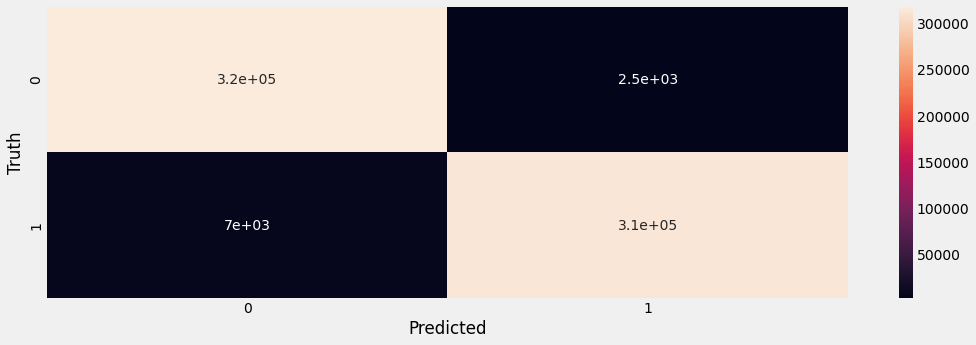

In [ ]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot = True )
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, final_predictions_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    320195
           1       0.99      0.98      0.99    319805

    accuracy                           0.99    640000
   macro avg       0.99      0.99      0.99    640000
weighted avg       0.99      0.99      0.99    640000

